# Using notes' topic mixtures as features to develop models for predicting length of MV

In [7]:
import pandas as pd
import numpy as np

## Read data

In [8]:
train_mixture_filename = r'/home/mcb/li_lab/zwen8/data/mimic/multi_datatypes_res_15_thre_d2/infer/train.csv'
train_duration_filename = r'/home/mcb/li_lab/zwen8/data/mimic/multi_datatypes_res_15_thre_d2/train_vent.txt'
valid_mixture_filename = r'/home/mcb/li_lab/zwen8/data/mimic/multi_datatypes_res_15_thre_d2/infer/validation.csv'
valid_duration_filename = r'/home/mcb/li_lab/zwen8/data/mimic/multi_datatypes_res_15_thre_d2/validation_vent.txt'
test_mixture_filename = r'/home/mcb/li_lab/zwen8/data/mimic/multi_datatypes_res_15_thre_d2/infer/test.csv'
test_duration_filename = r'/home/mcb/li_lab/zwen8/data/mimic/multi_datatypes_res_15_thre_d2/test_vent.txt'

In [9]:
train_mixtures = pd.read_csv(train_mixture_filename, header=None)
train_duration = pd.read_csv(train_duration_filename, header=None, sep=' ')
train_duration = train_duration[1].astype(np.float64)
valid_mixtures = pd.read_csv(valid_mixture_filename, header=None)
valid_duration = pd.read_csv(valid_duration_filename, header=None, sep=' ')
valid_duration = valid_duration[1].astype(np.float64)
test_mixtures = pd.read_csv(test_mixture_filename, header=None)
test_duration = pd.read_csv(test_duration_filename, header=None, sep=' ')
test_duration = test_duration[1].astype(np.float64)

In [10]:
train_mixtures.shape

(1233, 50)

In [11]:
train_duration.shape

(1233,)

## Convert to binarized duration

In [12]:
bi_train_duration = (train_duration > 7 * 24).astype(int)
bi_valid_duration = (valid_duration > 7 * 24).astype(int)
bi_test_duration = (test_duration > 7 * 24).astype(int)

## Logistic regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, roc_curve, average_precision_score, precision_recall_curve

In [14]:
lr = LogisticRegression(solver='liblinear', class_weight='balanced', max_iter=200)

In [15]:
lr.fit(train_mixtures, bi_train_duration)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=200, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
valid_predictions_lr = lr.predict(valid_mixtures)

In [17]:
print(average_precision_score(bi_valid_duration, valid_predictions_lr))
print(classification_report(bi_valid_duration, valid_predictions_lr))

0.19984018371115145
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       127
           1       0.26      0.30      0.28        27

    accuracy                           0.73       154
   macro avg       0.55      0.56      0.55       154
weighted avg       0.74      0.73      0.73       154



## Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
GNB = GaussianNB()

In [20]:
GNB.fit(train_mixtures, bi_train_duration)

GaussianNB(priors=None, var_smoothing=1e-09)

In [21]:
valid_predictions_GNB = GNB.predict(valid_mixtures)

In [22]:
print(average_precision_score(bi_valid_duration, valid_predictions_GNB))
print(classification_report(bi_valid_duration, valid_predictions_GNB))

0.1729431363577705
              precision    recall  f1-score   support

           0       0.82      0.46      0.59       127
           1       0.17      0.52      0.26        27

    accuracy                           0.47       154
   macro avg       0.50      0.49      0.42       154
weighted avg       0.71      0.47      0.53       154



## SVM

### Linear SVM

In [335]:
from sklearn.svm import LinearSVC

In [336]:
lsvm = LinearSVC()

In [337]:
lsvm.fit(train_mixtures, bi_train_duration)

/home/mcb/li_lab/zwen8/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [338]:
valid_predictions_lsvm = GNB.predict(valid_mixtures)

In [339]:
print(average_precision_score(bi_valid_duration, valid_predictions_lsvm))
print(classification_report(bi_valid_duration, valid_predictions_lsvm))

0.2197530864197531
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       108
           1       0.27      0.30      0.28        27

    accuracy                           0.70       135
   macro avg       0.54      0.55      0.54       135
weighted avg       0.71      0.70      0.70       135



### Non-linear SVM

In [340]:
from sklearn.svm import SVC

In [341]:
svm = SVC()

In [342]:
svm.fit(train_mixtures, bi_train_duration)

/home/mcb/li_lab/zwen8/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [343]:
valid_predictions_svm = GNB.predict(valid_mixtures)

In [344]:
print(average_precision_score(bi_valid_duration, valid_predictions_lsvm))
print(classification_report(bi_valid_duration, valid_predictions_lsvm))

0.2197530864197531
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       108
           1       0.27      0.30      0.28        27

    accuracy                           0.70       135
   macro avg       0.54      0.55      0.54       135
weighted avg       0.71      0.70      0.70       135



## Do Lasso regression

In [137]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [138]:
lasso = Lasso()

In [139]:
lasso.fit(train_mixtures, train_duration)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [140]:
valid_predictions_lasso = lasso.predict(valid_mixtures)

In [141]:
print(mean_squared_error(valid_duration, valid_predictions_lasso))

41810.96397345644


In [142]:
valid_predictions_lasso[0:5]

array([191.45907561, 198.95308671, 141.98132046, 154.46365004,
       222.04591674])

In [143]:
valid_duration.head()

0     68.016667
1    113.550000
2     80.450000
3    281.000000
4    161.000000
Name: 1, dtype: float64

## Grid Search LR
Logistic regression seems to be the best classifier. See how good it can be.

In [345]:
from sklearn.model_selection import GridSearchCV

In [346]:
estimator = LogisticRegression(solver='liblinear', class_weight='balanced')

In [347]:
hyperparams = {
    'C': np.arange(1.0, 1.8, step=0.02),
    'max_iter': [100, 200, 300]
              }

In [355]:
searcher = GridSearchCV(estimator=estimator, n_jobs=12, param_grid=hyperparams, scoring='average_precision', cv=5)

In [356]:
searcher.fit(train_mixtures, bi_train_duration)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=12,
             param_grid={'C': array([1.  , 1.02, 1.04, 1.06, 1.08, 1.1 , 1.12, 1.14, 1.16, 1.18, 1.2 ,
       1.22, 1.24, 1.26, 1.28, 1.3 , 1.32, 1.34, 1.36, 1.38, 1.4 , 1.42,
       1.44, 1.46, 1.48, 1.5 , 1.52, 1.54, 1.56, 1.58, 1.6 , 1.62, 1.64,
       1.66, 1.68, 1.7 , 1.72, 1.74, 1.76, 1.78]),
                         'max_iter

In [357]:
print(searcher.best_params_)

{'C': 1.2200000000000002, 'max_iter': 100}


In [358]:
print(searcher.best_score_)

0.3271045760722252


In [359]:
valid_predictions_lrbest = searcher.best_estimator_.predict(valid_mixtures)

In [360]:
print(average_precision_score(bi_valid_duration, valid_predictions_lrbest))
print(classification_report(bi_valid_duration, valid_predictions_lrbest))

0.2199546485260771
              precision    recall  f1-score   support

           0       0.83      0.66      0.73       108
           1       0.24      0.44      0.32        27

    accuracy                           0.61       135
   macro avg       0.54      0.55      0.52       135
weighted avg       0.71      0.61      0.65       135



In [361]:
valid_proba_lrbest = searcher.best_estimator_.predict_proba(valid_mixtures)[:, 1]
precision, recall, _ = precision_recall_curve(bi_valid_duration, valid_proba_lrbest, pos_label=1)

In [362]:
import matplotlib.pyplot as plt

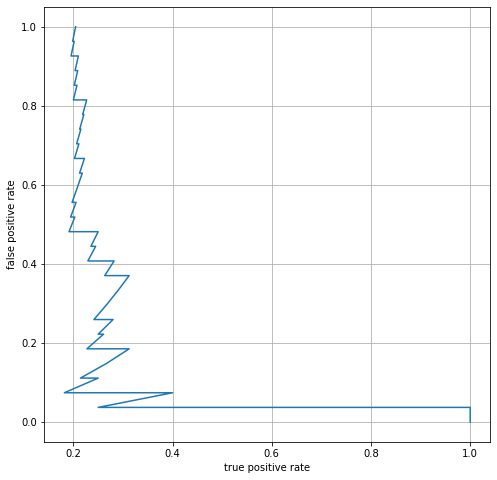

In [363]:
plt.figure(figsize=(8, 8))
plt.plot(precision, recall)
plt.xlabel('true positive rate')
plt.ylabel('false positive rate')
plt.grid()

## Try AdaBoost

In [112]:
from sklearn.ensemble import AdaBoostClassifier

In [113]:
ada = AdaBoostClassifier(base_estimator=LogisticRegression(solver='liblinear', C=1.5, max_iter=100, class_weight='balanced'), random_state=1)

In [114]:
ada.fit(train_mixtures, bi_train_duration)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.5,
                                                     class_weight='balanced',
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='warn',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='liblinear',
                                                     tol=0.0001, verbose=0,
                                                     warm_start=False),
                   learning_r

In [115]:
valid_predictions_ada = ada.predict(valid_mixtures)

In [116]:
print(roc_auc_score(bi_valid_duration, valid_predictions_ada))
print(classification_report(bi_valid_duration, valid_predictions_ada))

0.5772820064158647
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       127
           1       0.31      0.30      0.30        27

    accuracy                           0.76       154
   macro avg       0.58      0.58      0.58       154
weighted avg       0.76      0.76      0.76       154



## Try MLP (non-linear classifier)

In [117]:
from sklearn.neural_network import MLPClassifier

In [132]:
mlp = MLPClassifier(hidden_layer_sizes=(40, 30),
                   activation='relu',
                   solver='lbfgs',
                   early_stopping=False,
                   max_iter=300,
                   random_state=1,
                   n_iter_no_change=20,
                   verbose=True)

In [133]:
mlp.fit(train_mixtures, bi_train_duration)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(40, 30), learning_rate='constant',
              learning_rate_init=0.001, max_iter=300, momentum=0.9,
              n_iter_no_change=20, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [134]:
mlp.n_iter_

7

In [135]:
valid_predictions_mlp = mlp.predict(valid_mixtures)

In [136]:
print(roc_auc_score(bi_valid_duration, valid_predictions_mlp))
print(classification_report(bi_valid_duration, valid_predictions_mlp))

0.4666083406240886
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       127
           1       0.14      0.19      0.16        27

    accuracy                           0.65       154
   macro avg       0.47      0.47      0.47       154
weighted avg       0.69      0.65      0.67       154

